Consider the dataset
https://www.kaggle.com/datasets/ramkrijal/agriculture-vegetables-fruits-time-series-prices
which contains the time series of different vegetables.

a. Predict the Average selling price for any 5 commodities for the next 10 days on the best model of time series

b. Resample the data for the same 5 commodities as monthly data by averaging the
average price and then predict the Average selling price for the next 6 months on the best model of time series

For each commodity comment on whether resampled data gave a better prediction of the original one.

In [91]:
pip install pmdarima

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [93]:
df = pd.read_csv('/content/kalimati_tarkari_dataset.csv', index_col = 'Date')
df.head()

,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35.0,40.0,37.5
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5
2013-06-16,4,Onion Dry (Indian),Kg,28.0,30.0,29.0


In [94]:
df.tail()

,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2021-05-13,197156,Garlic Dry Nepali,Kg,100.0,120.0,110.0
2021-05-13,197157,Fish Fresh(Rahu),KG,270.0,280.0,275.0
2021-05-13,197158,Fish Fresh(Bachuwa),KG,225.0,235.0,230.0
2021-05-13,197159,Fish Fresh(Chhadi),KG,220.0,230.0,225.0
2021-05-13,197160,Fish Fresh(Mungari),KG,240.0,250.0,245.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197161 entries, 2013-06-16 to 2021-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Unit       197161 non-null  object 
 3   Minimum    197161 non-null  float64
 4   Maximum    197161 non-null  float64
 5   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.5+ MB


In [96]:
df.describe()

,SN,Minimum,Maximum,Average
count,197161.000000,197161.000000,197161.000000,197161.000000
mean,98580.000000,85.423938,94.161284,89.792611
std,56915.622549,77.058896,82.375858,79.619003
min,0.000000,1.000000,6.000000,5.000000
25%,49290.000000,40.000000,45.000000,42.500000
50%,98580.000000,60.000000,70.000000,65.000000
75%,147870.000000,100.000000,110.000000,105.000000
max,197160.000000,1800.000000,2000.000000,1900.000000


In [97]:
df.isnull().sum()

SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [98]:
print(df['Commodity'][:10])

Date
2013-06-16      Tomato Big(Nepali)
2013-06-16     Tomato Small(Local)
2013-06-16              Potato Red
2013-06-16            Potato White
2013-06-16      Onion Dry (Indian)
2013-06-16           Carrot(Local)
2013-06-16          Cabbage(Local)
2013-06-16             Cauli Local
2013-06-16             Raddish Red
2013-06-16    Raddish White(Local)
Name: Commodity, dtype: object


In [99]:
idx= pd.to_datetime(df.index).to_period('D')

In [100]:
df.columns

Index(['SN', 'Commodity', 'Unit', 'Minimum', 'Maximum', 'Average'], dtype='object')

##Let us consider :

##Potato Red, Carrot(Local), Cabbage(Local), Cauli Local, Raddish Red

##1) Potato red

In [101]:
df_potato = df[df['Commodity'] == 'Potato Red']
df_potato.drop('SN', axis =1, inplace = True)
df_potato.head()

,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,Potato Red,Kg,20.0,21.0,20.5
2013-06-17,Potato Red,Kg,20.0,21.0,20.5
2013-06-18,Potato Red,Kg,19.0,20.0,19.5
2013-06-19,Potato Red,Kg,20.0,21.0,20.5
2013-06-20,Potato Red,Kg,20.0,21.0,20.5


In [102]:
ytrain_potato = df_potato['Average'].iloc[:-10]
ytest_potato = df_potato['Average'].iloc[-10:]

In [103]:
#simple exponential smoothing
alpha = 0.1
ses= SimpleExpSmoothing(ytrain_potato)
fit1=ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(ytest_potato))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 20.5, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  2.1529348465311204


In [104]:
#Holts Linear
alpha= 0.1
beta = 0.01
holt = Holt(ytrain_potato)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_potato))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

{'smoothing_level': 0.1, 'smoothing_trend': 0.01, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 20.5, 'initial_trend': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  1.90258056785923


In [105]:
#Holts Exponential
alpha= 0.01
beta = 0.02
holt = Holt(ytrain_potato, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_potato))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

{'smoothing_level': 0.01, 'smoothing_trend': 0.02, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 20.5, 'initial_trend': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  1.3614118404146283


In [106]:
#Additive Damped
alpha= 0.1
beta = 0.01
phi = 0.02
holt = Holt(ytrain_potato, damped_trend = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  2.31334966981114


In [107]:
#Multiplicative Damped
alpha= 0.6
beta = 0.1
phi = 0.1
holt = Holt(ytrain_potato, damped_trend = True, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  6.293480308822792


In [108]:
#Additive Holt Winter
alpha= 0.1
beta = 0.02
gamma = 0.05
hw_add = ExponentialSmoothing(ytrain_potato, seasonal_periods=12, trend = 'add', seasonal= 'add')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  3.0298536989612135


In [109]:
#Multiplicative Holt Winter
alpha= 0.1
beta = 0.01
gamma = 0.01
hw_add = ExponentialSmoothing(ytrain_potato, seasonal_periods=12, trend = 'add', seasonal= 'mul')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  1.9070223481164799


In [110]:
#Addtive Holt-Winter with Damping
alpha= 0.3
beta = 0.01
gamma = 0.01
phi = 0.4
hw_add = ExponentialSmoothing(ytrain_potato, seasonal_periods=12, trend ='add', seasonal='add', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  6.448627152512284


In [111]:
#Multiplicative Holt-Winter with Damping
alpha= 0.3
beta = 0.01
gamma = 0.01
phi = 0.6
hw_add = ExponentialSmoothing(ytrain_potato, seasonal_periods=12, trend ='add', seasonal='mul', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  6.452364858319142


In [112]:
# ADF Test to check stationarity
result = adfuller(df_potato['Average'], maxlag = 1)
print('p value: ', result[1])
if result[1] < 0.05:
  print('Time Series is stationary')
else:
  print('Time Series is not stationary')

p value:  0.029816816276822037
Time Series is stationary


In [113]:
# Autocorrelation
acf_vals = sm.tsa.acf(df_potato['Average'])
acf_vals

array([1.        , 0.99053006, 0.98447062, 0.97786291, 0.9718597 ,
       0.96584507, 0.95936267, 0.95291262, 0.94615541, 0.94008701,
       0.93410234, 0.92852233, 0.92308448, 0.91808792, 0.91278925,
       0.90743448, 0.90140704, 0.89555566, 0.88943043, 0.88305378,
       0.87675428, 0.87009966, 0.8635439 , 0.85695862, 0.85047018,
       0.84429048, 0.83802063, 0.83169936, 0.82540892, 0.81918067,
       0.81299494, 0.80697965, 0.80045978, 0.79392534, 0.78693776])

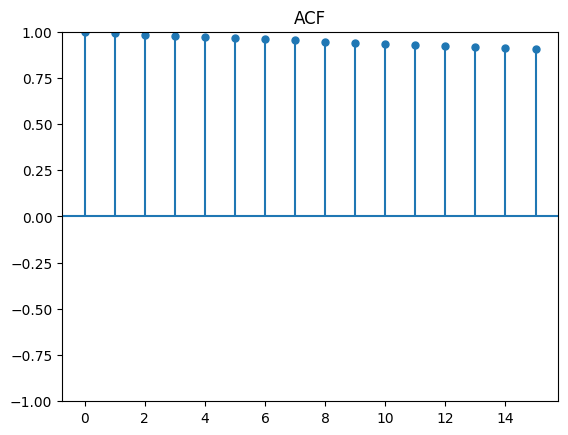

In [114]:
plot_acf(df_potato['Average'], lags = 15, alpha = None)
plt.title('ACF')
plt.show()

In [115]:
ar = 1
model = ARIMA(ytrain_potato, order = (ar,0,0))
model_fit = model.fit()

predictions = model_fit.predict( start = len(ytrain_potato), end = len(ytrain_potato) + len(ytest_potato) - 1, dynamic = False)
arima_error = mean_squared_error(ytest_potato, predictions)
print('\nTest RMSE: %.3f' %np.sqrt(arima_error))


Test RMSE: 4.990


##Carrot (Local)

In [116]:
df_carrot = df[df['Commodity'] == 'Carrot(Local)']
df_carrot.drop('SN', axis =1, inplace = True)
df_carrot.head()

,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,Carrot(Local),Kg,30.0,35.0,32.5
2013-06-17,Carrot(Local),Kg,35.0,40.0,37.5
2013-06-18,Carrot(Local),Kg,35.0,40.0,37.5
2013-06-19,Carrot(Local),Kg,38.0,42.0,40.0
2013-06-20,Carrot(Local),Kg,40.0,42.0,41.0


In [117]:
ytrain_carrot = df_carrot['Average'].iloc[:-10]
ytest_carrot = df_carrot['Average'].iloc[-10:]

In [118]:
#simple exponential smoothing
alpha = 0.9
ses= SimpleExpSmoothing(ytrain_carrot)
fit1=ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(ytest_carrot))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

{'smoothing_level': 0.9, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 32.5, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  5.062657569775106


In [119]:
#Holts Linear
alpha= 0.8
beta = 0.05
holt = Holt(ytrain_carrot)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_carrot))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

{'smoothing_level': 0.8, 'smoothing_trend': 0.05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 32.5, 'initial_trend': 5.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  3.702965249554696


In [120]:
#Holts Exponential
alpha= 0.9
beta = 0.09
holt = Holt(ytrain_carrot, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_carrot))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

{'smoothing_level': 0.9, 'smoothing_trend': 0.09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 32.5, 'initial_trend': 1.1538461538461537, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  3.7496928621734478


In [121]:
#Additive Damped
alpha= 0.9
beta = 0.08
phi = 0.08
holt = Holt(ytrain_carrot, damped_trend = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  4.33914609647188


In [122]:
#Multiplicative Damped
alpha= 0.9
beta = 0.7
phi = 0.8
holt = Holt(ytrain_carrot, damped_trend = True, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  4.79902558871736


In [123]:
#Additive Holt Winter
alpha= 0.1
beta = 0.02
gamma = 0.01
hw_add = ExponentialSmoothing(ytrain_carrot, seasonal_periods=12, trend = 'add', seasonal= 'add')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  16.456332390730324


In [124]:
#Multiplicative Holt Winter
alpha= 0.4
beta = 0.05
gamma = 0.01
hw_add = ExponentialSmoothing(ytrain_carrot, seasonal_periods=12, trend = 'add', seasonal= 'mul')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  3.4997172885931516


In [125]:
#Addtive Holt-Winter with Damping
alpha= 0.3
beta = 0.01
gamma = 0.01
phi = 0.4
hw_add = ExponentialSmoothing(ytrain_carrot, seasonal_periods=12, trend ='add', seasonal='add', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  6.836858676126112


In [126]:
#Multiplicative Holt-Winter with Damping
alpha= 0.3
beta = 0.01
gamma = 0.01
phi = 0.6
hw_add = ExponentialSmoothing(ytrain_carrot, seasonal_periods=12, trend ='add', seasonal='mul', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_carrot))

error= round(sqrt(mean_squared_error(ytest_carrot, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_carrot, fcast1)))

RMSE =  6.65011090057824


In [127]:
# ADF Test to check stationarity
result = adfuller(df_carrot['Average'], maxlag = 1)
print('p value: ', result[1])
if result[1] < 0.05:
  print('Time Series is stationary')
else:
  print('Time Series is not stationary')

p value:  1.4629591329633947e-05
Time Series is stationary


In [128]:
# Autocorrelation
acf_vals = sm.tsa.acf(df_carrot['Average'])
acf_vals

array([1.        , 0.97059993, 0.95465428, 0.94439024, 0.93361995,
       0.92117304, 0.91456428, 0.90618658, 0.89654339, 0.88960859,
       0.8811649 , 0.87333838, 0.86493798, 0.85583886, 0.84471198,
       0.83648107, 0.82712013, 0.81664307, 0.80886644, 0.79926411,
       0.79089424, 0.7816509 , 0.76880471, 0.75587363, 0.74477454,
       0.73111295, 0.71714437, 0.70539209, 0.69402561, 0.68494087,
       0.67445768, 0.66448984, 0.65508435, 0.64649365, 0.63507459])

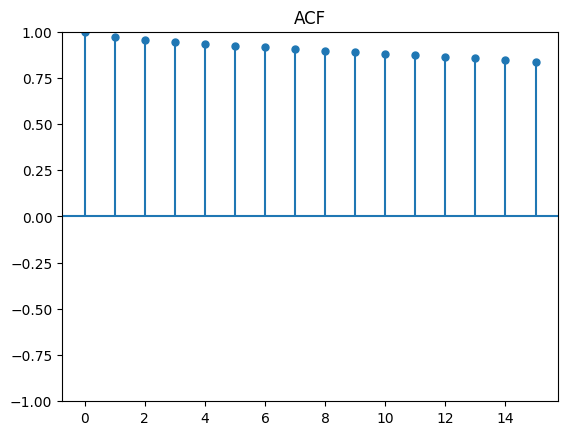

In [129]:
plot_acf(df_carrot['Average'], lags = 15, alpha = None)
plt.title('ACF')
plt.show()

In [130]:
ar = 1
model = ARIMA(ytrain_carrot, order = (ar,0,0))
model_fit = model.fit()

predictions = model_fit.predict( start = len(ytrain_carrot), end = len(ytrain_carrot) + len(ytest_carrot) - 1, dynamic = False)
arima_error = mean_squared_error(ytest_carrot, predictions)
print('\nTest RMSE: %.3f' %np.sqrt(arima_error))


Test RMSE: 6.080


##Cabbage(Local)

In [131]:
df_cabbage = df[df['Commodity'] == 'Cabbage(Local)']
df_cabbage.drop('SN', axis =1, inplace = True)
df_cabbage.head()

,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,Cabbage(Local),Kg,6.0,10.0,8.0
2013-06-17,Cabbage(Local),Kg,6.0,10.0,8.0
2013-06-18,Cabbage(Local),Kg,8.0,10.0,9.0
2013-06-19,Cabbage(Local),Kg,10.0,15.0,12.5
2013-06-20,Cabbage(Local),Kg,10.0,15.0,12.5


In [132]:
ytrain_cabbage = df_cabbage['Average'].iloc[:-10]
ytest_cabbage = df_cabbage['Average'].iloc[-10:]

In [133]:
#simple exponential smoothing
alpha = 0.1
ses= SimpleExpSmoothing(ytrain_cabbage)
fit1=ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(ytest_cabbage))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 8.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  7.870890793838909


In [134]:
#Holts Linear
alpha= 0.1
beta = 0.01
holt = Holt(ytrain_cabbage)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cabbage))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

{'smoothing_level': 0.1, 'smoothing_trend': 0.01, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 8.0, 'initial_trend': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  8.445184015383392


In [135]:
#Holts Exponential
alpha= 0.9
beta = 0.1
holt = Holt(ytrain_cabbage, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cabbage))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

{'smoothing_level': 0.9, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 8.0, 'initial_trend': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  5.385593797049956


In [136]:
#Additive Damped
alpha= 0.5
beta = 0.5
phi = 0.02
holt = Holt(ytrain_cabbage, damped_trend = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  2.6793242374403


In [137]:
#Multiplicative Damped
alpha= 0.5
beta = 0.5
phi = 0.1
holt = Holt(ytrain_cabbage, damped_trend = True, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  3.241427701011415


In [138]:
#Additive Holt Winter
alpha= 0.1
beta = 0.02
gamma = 0.05
hw_add = ExponentialSmoothing(ytrain_cabbage, seasonal_periods=12, trend = 'add', seasonal= 'add')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  10.946207113235216


In [139]:
#Multiplicative Holt Winter
alpha= 0.3
beta = 0.01
gamma = 0.3
hw_add = ExponentialSmoothing(ytrain_cabbage, seasonal_periods=12, trend = 'add', seasonal= 'mul')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  9.884109431905783


In [140]:
#Addtive Holt-Winter with Damping
alpha = 0.3
beta = 0.001
gamma = 0.75
phi = 0.1
hw_add = ExponentialSmoothing(ytrain_cabbage, seasonal_periods=12, trend ='add', seasonal='add', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  9.413545316019361


In [141]:
#Multiplicative Holt-Winter with Damping
alpha = 0.5
beta = 0.001
gamma = 0.95
phi = 0.3
hw_add = ExponentialSmoothing(ytrain_cabbage, seasonal_periods=12, trend ='add', seasonal='mul', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cabbage))

error= round(sqrt(mean_squared_error(ytest_cabbage, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

RMSE =  6.466155448358476


In [142]:
# ADF Test to check stationarity
result = adfuller(df_cabbage['Average'], maxlag = 1)
print('p value: ', result[1])
if result[1] < 0.05:
  print('Time Series is stationary')
else:
  print('Time Series is not stationary')

p value:  3.2063548921196207e-06
Time Series is stationary


In [143]:
# Autocorrelation
acf_vals = sm.tsa.acf(df_cabbage['Average'])
acf_vals

array([1.        , 0.96689351, 0.94940238, 0.93408621, 0.92113081,
       0.90978356, 0.9000301 , 0.89263067, 0.87964188, 0.86586226,
       0.85207196, 0.8413442 , 0.82754064, 0.81358811, 0.80007235,
       0.78687188, 0.77542209, 0.76233034, 0.74844166, 0.73764068,
       0.72199866, 0.7122091 , 0.70291051, 0.69389014, 0.68117322,
       0.6694546 , 0.66035859, 0.64964442, 0.64017066, 0.62904449,
       0.62076751, 0.60900664, 0.5980386 , 0.58725538, 0.57523346])

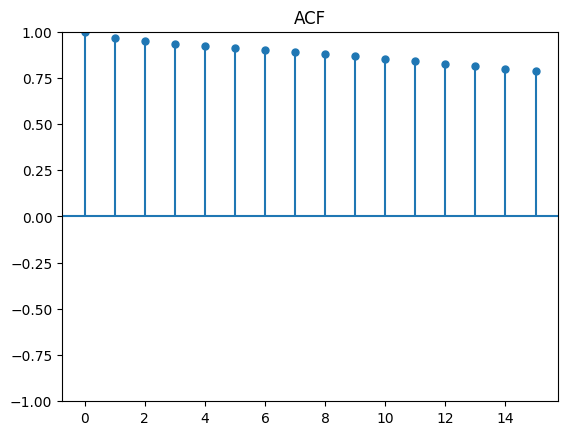

In [144]:
plot_acf(df_cabbage['Average'], lags = 15, alpha = None)
plt.title('ACF')
plt.show()

In [145]:
ar = 1
model = ARIMA(ytrain_cabbage, order = (ar,0,0))
model_fit = model.fit()

predictions = model_fit.predict( start = len(ytrain_cabbage), end = len(ytrain_cabbage) + len(ytest_cabbage) - 1, dynamic = False)
arima_error = mean_squared_error(ytest_cabbage, predictions)
print('\nTest RMSE: %.3f' %np.sqrt(arima_error))


Test RMSE: 5.075


##Cauli

In [146]:
df_cauli = df[df['Commodity'] == 'Cauli Local']
df_cauli.drop('SN', axis =1, inplace = True)
df_cauli.head()

,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,Cauli Local,Kg,30.0,35.0,32.5
2013-06-17,Cauli Local,Kg,25.0,30.0,27.5
2013-06-18,Cauli Local,Kg,25.0,30.0,27.5
2013-06-19,Cauli Local,Kg,25.0,30.0,27.5
2013-06-20,Cauli Local,Kg,20.0,25.0,22.5


In [147]:
ytrain_cauli = df_cauli['Average'].iloc[:-10]
ytest_cauli = df_cauli['Average'].iloc[-10:]

In [148]:
#simple exponential smoothing
alpha = 0.5
ses= SimpleExpSmoothing(ytrain_cauli)
fit1=ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(ytest_cauli))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

{'smoothing_level': 0.5, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 32.5, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  5.849008394412676


In [149]:
#Holts Linear
alpha= 0.25
beta = 0.05
holt = Holt(ytrain_cauli)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cauli))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

{'smoothing_level': 0.25, 'smoothing_trend': 0.05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 32.5, 'initial_trend': -5.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  8.464141677123697


In [150]:
#Holts Exponential
alpha= 0.9
beta = 0.1
holt = Holt(ytrain_cabbage, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cabbage))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_cabbage, fcast1)))

{'smoothing_level': 0.9, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 8.0, 'initial_trend': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  5.385593797049956


In [151]:
#Additive Damped
alpha= 0.001
beta = 0.7
phi = 0.02
holt = Holt(ytrain_cauli, damped_trend = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  10.933278292014593


In [152]:
#Multiplicative Damped
alpha= 0.10
beta = 0.75
phi = 0.01
holt = Holt(ytrain_cauli, damped_trend = True, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  8.269110570203665


In [153]:
#Additive Holt Winter
alpha = 0.3
beta = 0.01
gamma = 0.6
hw_add = ExponentialSmoothing(ytrain_cauli, seasonal_periods=12, trend = 'add', seasonal= 'add')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  8.687866207976288


In [154]:
#Multiplicative Holt Winter
alpha = 0.3
beta = 0.001
gamma = 0.1
hw_add = ExponentialSmoothing(ytrain_cauli, seasonal_periods=12, trend = 'add', seasonal= 'mul')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  9.260610449470487


In [155]:
#Addtive Holt-Winter with Damping
alpha = 0.3
beta = 0.001
gamma = 0.6
phi = 0.1
hw_add = ExponentialSmoothing(ytrain_cauli, seasonal_periods=12, trend ='add', seasonal='add', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  8.913056155041204


In [156]:
#Multiplicative Holt-Winter with Damping
alpha = 0.3
beta = 0.001
gamma = 0.75
phi = 0.1
hw_add = ExponentialSmoothing(ytrain_cauli, seasonal_periods=12, trend ='add', seasonal='mul', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_cauli))

error= round(sqrt(mean_squared_error(ytest_cauli, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_cauli, fcast1)))

RMSE =  8.38505546016785


In [157]:
# ADF Test to check stationarity
result = adfuller(df_cauli['Average'], maxlag = 1)
print('p value: ', result[1])
if result[1] < 0.05:
  print('Time Series is stationary')
else:
  print('Time Series is not stationary')

p value:  6.710269147647796e-09
Time Series is stationary


In [158]:
# Autocorrelation
acf_vals = sm.tsa.acf(df_cauli['Average'])
acf_vals

array([1.        , 0.94601395, 0.9222043 , 0.90742409, 0.89309599,
       0.87626584, 0.85927709, 0.8516158 , 0.83780166, 0.82839164,
       0.81630236, 0.80654941, 0.79140255, 0.77823855, 0.76762834,
       0.75329171, 0.74166188, 0.73064594, 0.72229857, 0.71219688,
       0.70163813, 0.69395808, 0.68062084, 0.6710418 , 0.65712385,
       0.64460961, 0.63327073, 0.62011886, 0.60658065, 0.59480188,
       0.58622827, 0.57696376, 0.56899221, 0.56110021, 0.55369674])

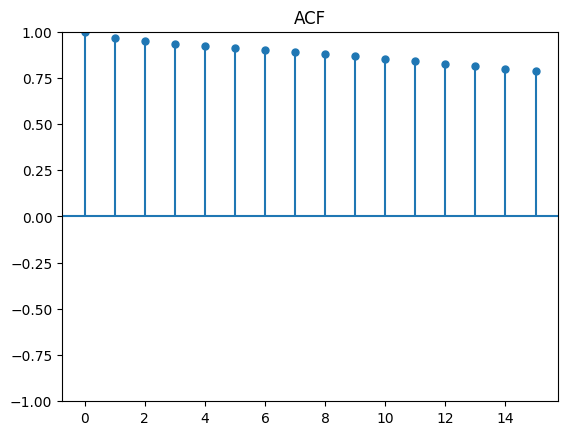

In [159]:
plot_acf(df_cabbage['Average'], lags = 15, alpha = None)
plt.title('ACF')
plt.show()

In [160]:
ar = 1
model = ARIMA(ytrain_cauli, order = (ar,0,0))
model_fit = model.fit()

predictions = model_fit.predict( start = len(ytrain_cauli), end = len(ytrain_cauli) + len(ytest_cauli) - 1, dynamic = False)
arima_error = mean_squared_error(ytest_cauli, predictions)
print('\nTest RMSE: %.3f' %np.sqrt(arima_error))


Test RMSE: 7.447


##Raddish White (Local)

In [161]:
df_raddish = df[df['Commodity'] == 'Raddish White(Local)']
df_raddish.drop('SN', axis =1, inplace = True)
df_raddish.head()

,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,Raddish White(Local),Kg,25.0,30.0,27.5
2013-06-17,Raddish White(Local),Kg,30.0,35.0,32.5
2013-06-18,Raddish White(Local),Kg,30.0,35.0,32.5
2013-06-19,Raddish White(Local),Kg,30.0,35.0,32.5
2013-06-20,Raddish White(Local),Kg,28.0,32.0,30.0


In [162]:
ytrain_raddish = df_raddish['Average'].iloc[:-10]
ytest_raddish = df_raddish['Average'].iloc[-10:]

In [163]:
#simple exponential smoothing
alpha = 0.90
ses= SimpleExpSmoothing(ytrain_raddish)
fit1=ses.fit(smoothing_level=alpha)
fcast1= fit1.forecast(len(ytest_raddish))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

{'smoothing_level': 0.9, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 27.5, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  6.026053005200747


In [164]:
#Holts Linear
alpha= 0.50
beta = 0.01
holt = Holt(ytrain_raddish)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_raddish))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 27.5, 'initial_trend': 5.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  9.960826026115512


In [165]:
#Holts Exponential
alpha= 0.5
beta = 0.09
holt = Holt(ytrain_raddish, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_raddish))

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

{'smoothing_level': 0.5, 'smoothing_trend': 0.09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 27.5, 'initial_trend': 1.1818181818181819, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  4.755965084975917


In [166]:
#Additive Damped
alpha= 0.1
beta = 0.01
phi = 0.02
holt = Holt(ytrain_potato, damped_trend = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_potato))

error= round(sqrt(mean_squared_error(ytest_potato, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_potato, fcast1)))

RMSE =  2.31334966981114


In [167]:
#Multiplicative Damped
alpha= 0.90
beta = 0.10
phi = 0.1
holt = Holt(ytrain_raddish, damped_trend = True, exponential = True)
fit1= holt.fit(smoothing_level=alpha, smoothing_trend = beta)
fcast1= fit1.forecast(len(ytest_raddish))

error= round(sqrt(mean_squared_error(ytest_raddish, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

RMSE =  4.311956133083545


In [168]:
#Additive Holt Winter
alpha = 0.1
beta = 0.001
gamma = 0.1
hw_add = ExponentialSmoothing(ytrain_raddish, seasonal_periods=12, trend = 'add', seasonal= 'add')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_raddish))

error= round(sqrt(mean_squared_error(ytest_raddish, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

RMSE =  22.812435152943436


In [169]:
#Multiplicative Holt Winter
alpha = 0.5
beta = 0.001
gamma = 0.5
hw_add = ExponentialSmoothing(ytrain_raddish, seasonal_periods=12, trend = 'add', seasonal= 'mul')
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_raddish))

error= round(sqrt(mean_squared_error(ytest_raddish, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

RMSE =  7.405457115358456


In [170]:
#Addtive Holt-Winter with Damping
alpha= 0.9
beta = 0.11
gamma = 0.01
phi = 0.4
hw_add = ExponentialSmoothing(ytrain_raddish, seasonal_periods=12, trend ='add', seasonal='add', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_raddish))

error= round(sqrt(mean_squared_error(ytest_raddish, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

RMSE =  3.7818414537277594


In [171]:
#Multiplicative Holt-Winter with Damping
alpha = 0.9
beta = 0.1
gamma = 0.1
phi = 0.01
hw_add = ExponentialSmoothing(ytrain_raddish, seasonal_periods=12, trend ='add', seasonal='mul', damped_trend=True)
fit1= hw_add.fit(smoothing_level=alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1= fit1.forecast(len(ytest_raddish))

error= round(sqrt(mean_squared_error(ytest_raddish, fcast1)),2)
print("RMSE = ", sqrt(mean_squared_error(ytest_raddish, fcast1)))

RMSE =  5.185443965336578


In [172]:
# ADF Test to check stationarity
result = adfuller(df_raddish['Average'], maxlag = 1)
print('p value: ', result[1])
if result[1] < 0.05:
  print('Time Series is stationary')
else:
  print('Time Series is not stationary')

p value:  1.0749655749058113e-09
Time Series is stationary


In [173]:
# Autocorrelation
acf_vals = sm.tsa.acf(df_raddish['Average'])
acf_vals

array([1.        , 0.94121883, 0.91441363, 0.89199486, 0.87492013,
       0.86153813, 0.84846439, 0.83802906, 0.82703112, 0.81782168,
       0.80725696, 0.79213714, 0.78259104, 0.76813005, 0.7560439 ,
       0.74292859, 0.72949915, 0.72047698, 0.70694906, 0.69438464,
       0.68041259, 0.66868215, 0.65584948, 0.6425238 , 0.63084847,
       0.61663201, 0.60254495, 0.59034307, 0.57965736, 0.57033039,
       0.55622595, 0.54665758, 0.53479775, 0.5265738 , 0.51774002])

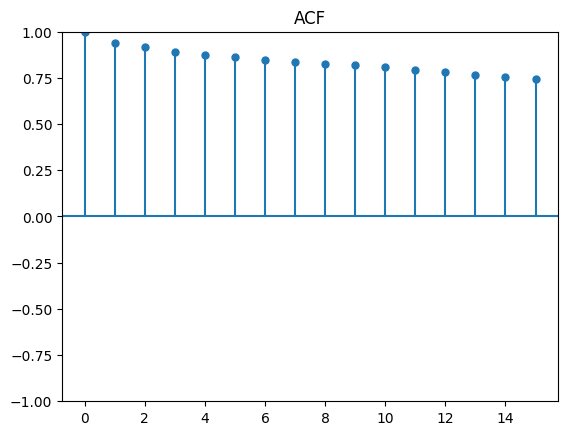

In [174]:
plot_acf(df_raddish['Average'], lags = 15, alpha = None)
plt.title('ACF')
plt.show()

In [175]:
ar = 1
model = ARIMA(ytrain_raddish, order = (ar,0,0))
model_fit = model.fit()

predictions = model_fit.predict( start = len(ytrain_raddish), end = len(ytrain_raddish) + len(ytest_raddish) - 1, dynamic = False)
arima_error = mean_squared_error(ytest_raddish, predictions)
print('\nTest RMSE: %.3f' %np.sqrt(arima_error))


Test RMSE: 5.297


##Result and Conclusion

Following are the best Models and predictions for the five commodities

* Potato : Holt's exponential- 1.3614118404146283
* Carrot : Multiplicative Holt Winter- 3.4997172885931516
* Cabbage : Additive Damping- 2.6793242374403
* Caulli : Holt's Exponential- 5.385593797049956
* Raddish : Aadditive Damping- 2.31334966981114

## Resampling and Predictions

Resample the data for the same 5 commodities as monthly data by averaging the average price and then predict the Average selling price for the next 6 months on the best model of time series

### Resampling

In [177]:
df_potato.index = pd.to_datetime(df_potato.index)
df_carrot.index = pd.to_datetime(df_carrot.index)
df_cabbage.index = pd.to_datetime(df_cabbage.index)
df_cauli.index = pd.to_datetime(df_cauli.index)
df_raddish.index = pd.to_datetime(df_raddish.index)

In [178]:
# Resampling

df_potato_m = df_potato['Average'].resample('M').mean()
df_carrot_m = df_carrot['Average'].resample('M').mean()
df_cabbage_m = df_cabbage['Average'].resample('M').mean()
df_cauli_m = df_cauli['Average'].resample('M').mean()
df_raddish_m = df_raddish['Average'].resample('M').mean()

In [180]:
# Rename the index to 'Month' for each commodity

for i in [df_potato_m, df_carrot_m, df_cabbage_m, df_cauli_m, df_raddish_m]:
  i.index.rename('Month', inplace=True)

In [182]:
# taking the last 6 months data as a test set

y_train_potato_m = df_potato_m.iloc[:-6]
y_test_potato_m = df_potato_m.iloc[-6:]

y_train_carrot_m = df_carrot_m.iloc[:-6]
y_test_carrot_m = df_carrot_m.iloc[-6:]

y_train_cabbage_m = df_cabbage_m.iloc[:-6]
y_test_cabbage_m = df_cabbage_m.iloc[-6:]

y_train_cauli_m = df_cauli_m.iloc[:-6]
y_test_cauli_m = df_cauli_m.iloc[-6:]

y_train_raddish_m = df_raddish_m.iloc[:-6]
y_test_raddish_m = df_raddish_m.iloc[-6:]

### Model Fitting

In [193]:
#Potato

holt_mul_potato_m = Holt(y_train_potato_m, exponential = True, damped_trend = True)
fit_mul_potato_m = holt_mul_potato_m.fit(smoothing_level = 0.01, smoothing_trend = 0.05)
fcast_mul_potato_m = fit_mul_potato_m.forecast(len(y_test_potato_m))

# Carrot
ses_carrot_m = SimpleExpSmoothing(y_train_carrot_m)
fit_ad_carrot_m = ses_carrot_m.fit(smoothing_level = 0.5)
fcast_ad_carrot_m = fit_ad_carrot_m.forecast(len(y_test_carrot_m))

# Cabbage
holt_ad_cabbage_m = Holt(y_train_cabbage_m, damped_trend = True)
fit_ad_cabbage_m = holt_ad_cabbage_m.fit(smoothing_level = 0.5, smoothing_trend = 0.5)
fcast_ad_cabbage_m = fit_ad_cabbage_m.forecast(len(y_test_cabbage_m))

# Cauli
holt_ad_cauli_m = Holt(y_train_cauli_m, damped_trend = True)
fit_ad_cauli_m = holt_ad_cauli_m.fit(smoothing_level = 0.01, smoothing_trend = 0.9)
fcast_ad_cauli_m = fit_ad_cauli_m.forecast(len(y_test_cauli_m))

# Raddish Red
holt_ad_raddish_m = Holt(y_train_raddish_m, damped_trend = True)
fit_ad_raddish_m = holt_ad_raddish_m.fit(smoothing_level = 0.9, smoothing_trend = 0.1)
fcast_ad_raddish_m = fit_ad_raddish_m.forecast(len(y_test_raddish_m))

In [194]:
rmse_resampling = [np.sqrt(mean_squared_error(y_test_potato_m , fcast_mul_potato_m)),
                   np.sqrt(mean_squared_error(y_test_carrot_m , fcast_ad_carrot_m)),
                   np.sqrt(mean_squared_error(y_test_cabbage_m , fcast_ad_cabbage_m)),
                   np.sqrt(mean_squared_error(y_test_cauli_m , fcast_ad_cauli_m)),
                   np.sqrt(mean_squared_error(y_test_raddish_m , fcast_ad_raddish_m))]
rmse_resampling

[571.853530137349,
 18.48904878845431,
 48.54028874786778,
 24.056717616379327,
 22.070603689981482]

### Predictions

In [197]:
res_df_potato_m = pd.DataFrame({'Commodity': 'Potato', 'y_test': y_test_potato_m.reset_index(drop=True), 'predictions': fcast_mul_potato_m.reset_index(drop=True)})
res_df_carrot_m = pd.DataFrame({'Commodity': 'Carrot', 'y_test': y_test_carrot_m.reset_index(drop=True), 'predictions': fcast_ad_carrot_m.reset_index(drop=True)})
res_df_cabbage_m = pd.DataFrame({'Commodity': 'Cabbage (Local)', 'y_test': y_test_cabbage_m.reset_index(drop=True), 'predictions': fcast_ad_cabbage_m.reset_index(drop=True)})
res_df_cauli_m = pd.DataFrame({'Commodity': 'Cauli (Local)', 'y_test': y_test_cauli_m.reset_index(drop=True), 'predictions': fcast_ad_cauli_m.reset_index(drop=True)})
res_df_raddish_m = pd.DataFrame({'Commodity': 'Raddish Red (Local)', 'y_test': y_test_raddish_m.reset_index(drop=True), 'predictions': fcast_ad_raddish_m.reset_index(drop=True)})

res_df_potato_m.index = y_test_potato_m.index
res_df_carrot_m.index = y_test_carrot_m.index
res_df_cabbage_m.index = y_test_cabbage_m.index
res_df_cauli_m.index = y_test_cauli_m.index
res_df_raddish_m.index = y_test_raddish_m.index

df_concatenated = pd.concat([res_df_potato_m, res_df_carrot_m, res_df_cabbage_m, res_df_cauli_m, res_df_raddish_m], ignore_index=False)

print(df_concatenated)

                      Commodity     y_test  predictions
Month                                                  
2020-12-31               Potato  60.080645   593.663225
2021-01-31               Potato  34.435484   599.628933
2021-02-28               Potato  26.839286   605.594034
2021-03-31               Potato  27.783333   611.557937
2021-04-30               Potato  34.083333   617.520053
2021-05-31               Potato  38.846154   623.479802
2020-12-31               Carrot  82.983871    78.073494
2021-01-31               Carrot  85.967742    78.073494
2021-02-28               Carrot  52.685185    78.073494
2021-03-31               Carrot  52.750000    78.073494
2021-04-30               Carrot  71.416667    78.073494
2021-05-31               Carrot  52.884615    78.073494
2020-12-31      Cabbage (Local)  31.596774    64.198960
2021-01-31      Cabbage (Local)  23.306452    67.849597
2021-02-28      Cabbage (Local)  16.910714    70.770107
2021-03-31      Cabbage (Local)  12.816667    73